<a href="https://colab.research.google.com/github/whataLIN/MachineLearning/blob/main/ch08_ML_03_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# https://www.kaggle.com/datasets/akhil0007/wine-data
url = "https://github.com/BigData23th/Data/raw/main/wine.csv"
df = pd.read_csv(url)
df

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,1,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,1,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,1,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.7100,5.6500,2.4500,20.5000,95,1.6800,0.6100,0.5200,1.0600,7.7000,0.6400,1.7400,740
174,3,13.4000,3.9100,2.4800,23.0000,102,1.8000,0.7500,0.4300,1.4100,7.3000,0.7000,1.5600,750
175,3,13.2700,4.2800,2.2600,20.0000,120,1.5900,0.6900,0.4300,1.3500,10.2000,0.5900,1.5600,835
176,3,13.1700,2.5900,2.3700,20.0000,120,1.6500,0.6800,0.5300,1.4600,9.3000,0.6000,1.6200,840


In [72]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,1,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,1,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,1,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [73]:
df.tail()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,3,13.7100,5.6500,2.4500,20.5000,95,1.6800,0.6100,0.5200,1.0600,7.7000,0.6400,1.7400,740
174,3,13.4000,3.9100,2.4800,23.0000,102,1.8000,0.7500,0.4300,1.4100,7.3000,0.7000,1.5600,750
175,3,13.2700,4.2800,2.2600,20.0000,120,1.5900,0.6900,0.4300,1.3500,10.2000,0.5900,1.5600,835
176,3,13.1700,2.5900,2.3700,20.0000,120,1.6500,0.6800,0.5300,1.4600,9.3000,0.6000,1.6200,840
177,3,14.1300,4.1000,2.7400,24.5000,96,2.0500,0.7600,0.5600,1.3500,9.2000,0.6100,1.6000,560


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [75]:
pd.options.display.float_format = '{:,.4f}'.format
df.describe()
# 1. 변수마다 값의 범위가 다름 -> 거리기반 (단위가 통일되어 있지 않으면 큰 값의 독립변수가 다른 변수의 영향을 상쇄시킴)
# => 단위를 비슷하게 만들어줘야함 => 스케일링(scaling)
# 스케일링(scaling) : 독립변수의 범위를 동일한 수준으로 만들어주는 작업/기법
# 2. 이상치 (outlier) : 갑자기 폭증하거나 갑자기 줄어드는 그러한 '튀는 값' -> 왜곡

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


<Axes: xlabel='Color_Intensity', ylabel='Count'>

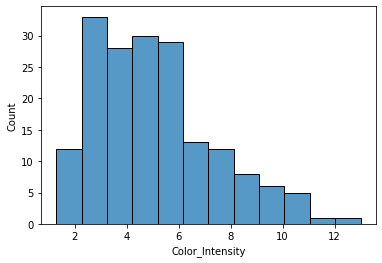

In [76]:
sns.histplot(df, x='Color_Intensity')     #이거뭐임?

In [77]:
# 등급 -> Class

df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

<Axes: ylabel='Class'>

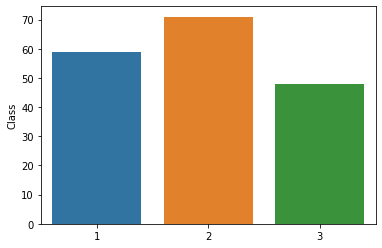

In [78]:
vc = df.Class.value_counts()
sns.barplot(x=vc.index, y=vc)

# 전처리

### 스케일링
* 데이터의 스케일(Scale, 범위)을 맞추는 작업
* K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음
* 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드는 작업
* 데이터를 **동등한 수준**에서 연산하게 함

#### 스케일링 종류
|종류|설명
|-|-|
|표준화 스케일링 Standarad Scaling|평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용|
|로버스트 스케일링 Robust Scaling|데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용|
|최소-최대 스케일링 Min-Max Scaling|데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
|정규화 스케일링 Normalizer Scaling|행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

#### 표준화 스케일링
> 데이터를 표준정규분포 형태로 변형

$x_i-mean(x)\over sd(x)$

* $x_i$ : 변수의 i번째 값
* $mean(x)$ : 해당 변수의 평균
* $sd(x)$ : 해당 변수의 표준편차

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
st_scaler = StandardScaler()    #객체임

In [81]:
# df의 각 열의 평균과 표준편차 -> 학습
# 각 값에 표준화 스케일링의 공식을 적용
# df을 기준으로 표준화 스케일링을 진행하는 객체

st_scaler.fit(df)   #일단 학습

StandardScaler()

In [82]:
df.iloc[:,1]

0     14.2300
1     13.2000
2     13.1600
3     14.3700
4     13.2400
        ...  
173   13.7100
174   13.4000
175   13.2700
176   13.1700
177   14.1300
Name: Alcohol, Length: 178, dtype: float64

In [83]:
st_df=st_scaler.transform(df)   #fit후 변형

In [84]:
st_df[:,1]    #모든 열의 첫번째 행.

#0이 평균, 표준편차가 1이 되도록 변환

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

In [85]:
st_df2 = pd.DataFrame(
    st_df, columns = df.columns
)

st_df2    #표준화 스케일링

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.2139,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,-1.2139,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,-1.2139,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,-1.2139,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,-1.2139,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.3739,0.8763,2.9745,0.3052,0.3018,-0.3329,-0.9856,-1.4249,1.2743,-0.9302,1.1428,-1.3928,-1.2312,-0.0220
174,1.3739,0.4933,1.4126,0.4148,1.0525,0.1586,-0.7933,-1.2843,0.5491,-0.3170,0.9698,-1.1295,-1.4854,0.0099
175,1.3739,0.3328,1.7447,-0.3894,0.1517,1.4224,-1.1298,-1.3446,0.5491,-0.4221,2.2242,-1.6121,-1.4854,0.2806
176,1.3739,0.2092,0.2277,0.0127,0.1517,1.4224,-1.0337,-1.3546,1.3549,-0.2293,1.8349,-1.5683,-1.4007,0.2965


<Axes: xlabel='Color_Intensity', ylabel='Density'>

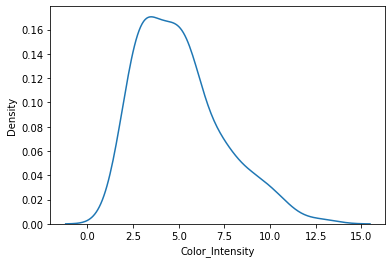

In [86]:
sns.kdeplot(data=df, x='Color_Intensity')

<Axes: xlabel='Color_Intensity', ylabel='Density'>

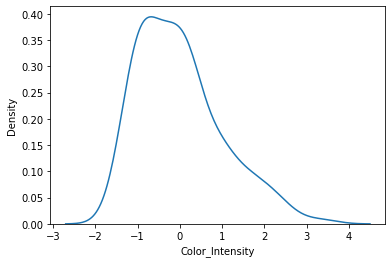

In [87]:
sns.kdeplot(data=st_df2, x='Color_Intensity')     #모양은 유사, 단위가 달라짐

In [88]:
st_df2.describe()

# mean은 0, std가 1
# 이상치가 있으면 개망함
# 최빈값, 평균값, 중간값이 일치해야되는데 아닐수도잇음

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-1.2139,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8682,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932
25%,-1.2139,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7401,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846
50%,0.0800,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1761,-0.0629,-0.1592,0.0331,0.2377,-0.2337
75%,1.3739,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6095,0.6292,0.4940,0.7132,0.7886,0.7582
max,1.3739,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4024,3.4851,3.4354,3.3017,1.9609,2.9715


#### 로버스트 스케일링
> 사분위값을 이용하여 계산

$x_i-Q_2(x)\over Q_3(x)-Q_1(x)$

* $x_i$ : 변수의 i번째 값
* $Q_1(x)$ : 25% 지점
* $Q_2(x)$ : 50% 지점 (변수의 중윗값)
* $Q_3(x)$ : 75% 지점

In [89]:
from sklearn.preprocessing import RobustScaler
#깎아서만듦 - 극단값에 예민하지 않다

In [90]:
rb_scaler = RobustScaler()

In [91]:
# fit -> transform 
# fit_transform (scaler 객체 안에 fit한 정보는 유지)

rb_scaled = rb_scaler.fit_transform(df)   #fit,transform 동시에.
rb_scaled

array([[-0.5       ,  0.8973384 , -0.10472973, ...,  0.22222222,
         0.92494929,  0.80804954],
       [-0.5       ,  0.11406844, -0.05743243, ...,  0.25185185,
         0.5030426 ,  0.77708978],
       [-0.5       ,  0.08365019,  0.33445946, ...,  0.19259259,
         0.31643002,  1.05572755],
       ...,
       [ 0.5       ,  0.16730038,  1.63175676, ..., -1.11111111,
        -0.98985801,  0.33333333],
       [ 0.5       ,  0.09125475,  0.48986486, ..., -1.08148148,
        -0.94117647,  0.34365325],
       [ 0.5       ,  0.82129278,  1.51013514, ..., -1.05185185,
        -0.95740365, -0.23426213]])

In [92]:
rb_df = pd.DataFrame(rb_scaled, columns=df.columns)

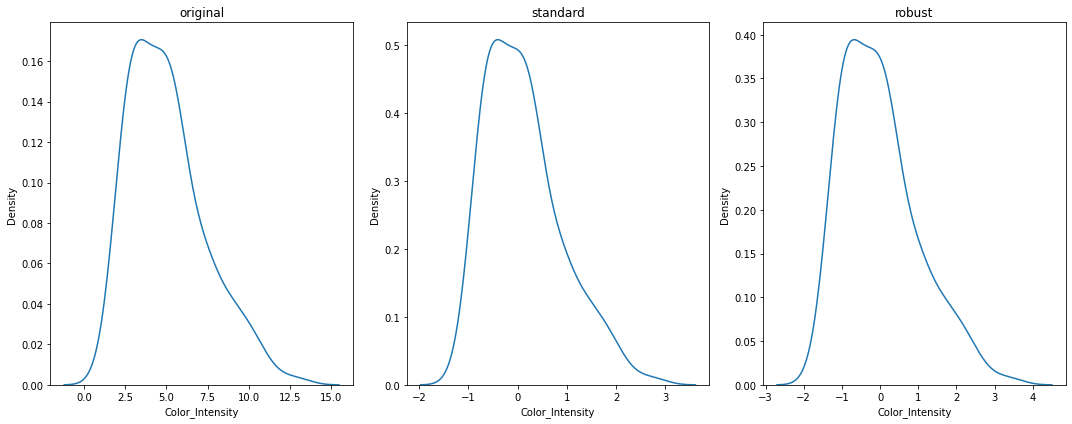

In [93]:
plt.figure(figsize=(15,6))

plt.subplot(131)
plt.title('original')
sns.kdeplot(data=df, x='Color_Intensity')
plt.subplot(132)
plt.title('standard')
sns.kdeplot(data=rb_df, x='Color_Intensity')
plt.subplot(133)
plt.title('robust')
sns.kdeplot(data=st_df2, x='Color_Intensity')

plt.tight_layout()
plt.show()

In [94]:
rb_df.describe()

#50%가 중간지점. 25%, 75%는 반의반지점

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0309,-0.0376,0.3185,0.0188,-0.0012,0.0917,-0.0566,-0.0633,0.1305,0.0513,0.1235,-0.0224,-0.1366,0.1515
std,0.3875,0.6174,0.7548,0.7895,0.7766,0.7517,0.5918,0.5981,0.7430,0.8177,0.7779,0.6772,0.5761,0.6500
min,-0.5000,-1.5361,-0.7601,-2.8777,-2.0698,-1.4737,-1.3002,-1.0749,-1.2537,-1.6357,-1.1443,-1.4370,-1.2252,-0.8163
25%,-0.5000,-0.5228,-0.1774,-0.4317,-0.5349,-0.5263,-0.5792,-0.5569,-0.4179,-0.4357,-0.4933,-0.5407,-0.6836,-0.3571
50%,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.5000,0.4772,0.8226,0.5683,0.4651,0.4737,0.4208,0.4431,0.5821,0.5643,0.5067,0.4593,0.3164,0.6429
max,0.5000,1.3536,2.6588,2.5036,2.4419,3.3684,1.4421,1.7635,1.9104,2.8929,2.7886,2.2074,0.9899,2.0774


#### 최소-최대 스케일링
> 최솟값, 최댓값을 사용하여 스케일링, 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨

$x_i-min(x)\over max(x)-min(x)$

* $x_i$ : 변수의 i번째 값
* $min(x)$ : 최솟값
* $max(x)$ : 최댓값

- 모양을 덜해침
- 통계적으로 변형 필요한 데이터가 변형되지 않을 경우

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df)
mm_df = pd.DataFrame(mm_scaled, columns=df.columns)
mm_df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.4691,0.5186,0.3155,0.5382,0.4585,0.3233,0.4535,0.3564,0.4375,0.3725,0.3224,0.3882,0.4915,0.3344
std,0.3875,0.2136,0.2208,0.1467,0.1721,0.1552,0.2158,0.2107,0.2348,0.1806,0.1978,0.1858,0.2601,0.2246
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.3507,0.1705,0.4545,0.3402,0.1957,0.2629,0.1825,0.2642,0.2650,0.1655,0.2459,0.2445,0.1587
50%,0.5000,0.5316,0.2223,0.5348,0.4588,0.3043,0.4741,0.3787,0.3962,0.3612,0.2910,0.3943,0.5531,0.2821
75%,1.0000,0.6967,0.4629,0.6404,0.5619,0.4022,0.6276,0.5348,0.5802,0.4858,0.4198,0.5203,0.6960,0.5043
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 스케일링 방식 선택 기준
* 아웃라이어(이상치)의 유무 : 아웃라이어 영향이 클 시 로버스트 스케일링이 적합 (4분위값 이용)
* 데이터의 기존 분포를 최대한 유지해야할 시 : 최소-최대 스케일링
* 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : 표준화 스케일링

#### 스케일링별 특징
|구분|결과물의 특징|
|-|-|
|표준화 스케일링|아웃라이어의 영향을 받음.<br>평균 0, 분산 1이 되게끔 분포시키기 때문에, **데이터의 기존 분포 형태가 사라지고** 정규분포를 따르는 결과물을 가져 옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때,<br> **아웃라이어의 영향을 받지 않음**.<br>변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|아웃라이어의 영향을 받음.<br>위의 두 스케일러와 비교했을 때, **데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화**시킴.<br>데이터의 범위는 0~1로 나타남|

#### 스케일링 적용 시 주의점
* 스케일링 대상에서 **종속변수를 제외**
* 스케일링 전 훈련셋과 시험셋을 구분

In [97]:
df.Class.value_counts()/len(df.Class)

2   0.3989
1   0.3315
3   0.2697
Name: Class, dtype: float64

In [98]:
# 종속변수 (y) / 독립변수들 (x)
# 훈련셋과 시험셋 구분 (train, test) => 스케일링
# X_test 스케일링은 어떻게 해요?

from sklearn.model_selection import train_test_split #훈련셋/시험셋ㅅ

#class

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1),
    df.Class, test_size=0.2, random_state=21,
    stratify=df.Class
) #stratify : 클래스를 균질하게 계층화하여 나눠줌

In [99]:
# 스케일링은 X_test가 아니라 X_train에 대해서만 scaling함

X_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
80,12.0000,0.9200,2.0000,19.0000,86,2.4200,2.2600,0.3000,1.4300,2.5000,1.3800,3.1200,278
27,13.3000,1.7200,2.1400,17.0000,94,2.4000,2.1900,0.2700,1.3500,3.9500,1.0200,2.7700,1285
85,12.6700,0.9800,2.2400,18.0000,99,2.2000,1.9400,0.3000,1.4600,2.6200,1.2300,3.1600,450
29,14.0200,1.6800,2.2100,16.0000,96,2.6500,2.3300,0.2600,1.9800,4.7000,1.0400,3.5900,1035
77,11.8400,2.8900,2.2300,18.0000,112,1.7200,1.3200,0.4300,0.9500,2.6500,0.9600,2.5200,500


In [117]:
mm_scaler = MinMaxScaler()

X_train_scaled = mm_scaler.fit_transform(X_train)
X_train_scaled

array([[0.26075269, 0.03557312, 0.19607843, ..., 0.73170732, 0.67765568,
        0.        ],
       [0.61021505, 0.19367589, 0.2875817 , ..., 0.43902439, 0.54945055,
        0.71825963],
       [0.44086022, 0.04743083, 0.35294118, ..., 0.6097561 , 0.69230769,
        0.12268188],
       ...,
       [0.54301075, 0.25889328, 0.99346405, ..., 0.52845528, 0.70695971,
        0.39372325],
       [0.32795699, 0.19565217, 0.2745098 , ..., 0.42276423, 0.6959707 ,
        0.16547789],
       [0.33870968, 0.13241107, 0.18300654, ..., 0.6097561 , 0.53846154,
        0.10699001]])

In [108]:
mm_scaler.data_max_, mm_scaler.data_min_, mm_scaler.data_range_
# 여기잇는 값들로 스케일링진행함 - 변수명 등...

(array([1.475e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
        5.080e+00, 6.600e-01, 3.580e+00, 1.175e+01, 1.710e+00, 4.000e+00,
        1.680e+03]),
 array([1.103e+01, 7.400e-01, 1.700e+00, 1.120e+01, 7.800e+01, 1.100e+00,
        4.700e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01, 1.270e+00,
        2.780e+02]),
 array([3.720e+00, 5.060e+00, 1.530e+00, 1.880e+01, 8.400e+01, 2.780e+00,
        4.610e+00, 5.300e-01, 3.170e+00, 1.047e+01, 1.230e+00, 2.730e+00,
        1.402e+03]))

In [ ]:
# scaler의 fit 자체는 train 데이터로만 진행을 하는데
# model을 사용해서 pred. => test 데이터는 이미 학습된 scaler를 사용한다
X_test_scaled = mm_scaler.transform(X_test)

X_test_scaled    #학습된 최대최소를 가지고 스케일링 진행

# 모델링 & 예측/평가 

In [118]:
# from sklearn.linear_model...
# 이미 정의된 모델 알고리즘을 SKlearn 혹은 다른 알고리즘 패키지
from sklearn.neighbors import KNeighborsClassifier # 분류 문제 풀 때 (범주형 변수)
# from sklearn.neighbors import KNeighborsRegressor -> 회귀 문제 풀 때 (연속형 변수 풀 때)

In [119]:
knn = KNeighborsClassifier()

In [121]:
knn.fit(X_train_scaled, y_train)   #학습시키기 !! 지도학습 : 관측, 예측값이 둘 다 있어야 해용 (독립+종속)
y_pred=knn.predict(X_test_scaled)
y_pred


array([2, 3, 2, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 3])

In [122]:
knn.predict_proba(X_test_scaled)  #knn -> k는우리가정해야됨... 디폴트5


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.2, 0.8, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.8, 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [123]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)    #실제값과 모델을 통한 예측값의 일치정도

0.9722222222222222

# 하이퍼파라미터 튜닝
`KNeighborsClassifier` : 분류 문제 해결 시 사용하는 클래스<br>
`KNeighborsRegressor` : 회귀 문제 해결 시 사용하는 클래스
```
(class) KNeighborsClassifier(
    n_neighbors: int = 5, *,
    weights: str = "uniform",
    algorithm: str = "auto",
    leaf_size: int = 30,
    p: int = 2,
    metric: str = "minkowski",
    metric_params: Any | None = None,
    n_jobs: Any | None = None)
```
* n_neighbors : 예측에 참고할 이웃 수 (5개)
* weights : 예측에 사용되는 가중치 함수 - 기본값 : uniform - 모든 점에 동일한 가중치 부여
* metric : 거리 측정 기준 (minkowski)
* n_jobs : 실행할 병렬 작업 수

In [124]:
def tuning(n: int):
    '''
    n을 받아서 해당 값으로 KNN 모델을 하이퍼 패러미터 변경
    '''
    knn = KNeighborsClassifier(n_neighbors=n) # n의 값을 넣으면 해당 n을 knn의 근접 이웃수 판단 기준으로 사용하는 모델이 만들어짐
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [126]:
tuning(6)

0.9444444444444444

In [127]:
for i in range(1, 21):
    print(i, tuning(i))

1 0.9722222222222222
2 0.9722222222222222
3 0.9722222222222222
4 0.9444444444444444
5 0.9722222222222222
6 0.9444444444444444
7 0.9444444444444444
8 0.9444444444444444
9 0.9722222222222222
10 0.9722222222222222
11 0.9722222222222222
12 0.9722222222222222
13 0.9722222222222222
14 0.9722222222222222
15 0.9722222222222222
16 0.9722222222222222
17 0.9722222222222222
18 0.9722222222222222
19 0.9722222222222222
20 0.9722222222222222


In [128]:
scores = [(i, tuning(i)) for i in range(1, 21)]
scores

[(1, 0.9722222222222222),
 (2, 0.9722222222222222),
 (3, 0.9722222222222222),
 (4, 0.9444444444444444),
 (5, 0.9722222222222222),
 (6, 0.9444444444444444),
 (7, 0.9444444444444444),
 (8, 0.9444444444444444),
 (9, 0.9722222222222222),
 (10, 0.9722222222222222),
 (11, 0.9722222222222222),
 (12, 0.9722222222222222),
 (13, 0.9722222222222222),
 (14, 0.9722222222222222),
 (15, 0.9722222222222222),
 (16, 0.9722222222222222),
 (17, 0.9722222222222222),
 (18, 0.9722222222222222),
 (19, 0.9722222222222222),
 (20, 0.9722222222222222)]

In [130]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(1, 0.9722222222222222),
 (2, 0.9722222222222222),
 (3, 0.9722222222222222),
 (5, 0.9722222222222222),
 (9, 0.9722222222222222),
 (10, 0.9722222222222222),
 (11, 0.9722222222222222),
 (12, 0.9722222222222222),
 (13, 0.9722222222222222),
 (14, 0.9722222222222222),
 (15, 0.9722222222222222),
 (16, 0.9722222222222222),
 (17, 0.9722222222222222),
 (18, 0.9722222222222222),
 (19, 0.9722222222222222),
 (20, 0.9722222222222222),
 (4, 0.9444444444444444),
 (6, 0.9444444444444444),
 (7, 0.9444444444444444),
 (8, 0.9444444444444444)]

# 알고리즘 이해
* KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류
* 변수의 스케일 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음
* 거리가 동점일 경우
  * 사이킷런 : 랜덤으로 분류함
  * n을 홀수로 하면 동점을 근본적으로 막을 수 있음
  * 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌

# 연습
* 타이타닉 데이터를 통해 KNN을 사용해보기
  * 전처리까지 끝난 df를 -> to_csv로 저장한 다음에 새로운 노트북에 하면 깔끔 (google.colab -> files)
* 스케일러(표준화,로버스트,최소-최대)별 결과 비교 (정확도)
  * model.predict() <- 전처리하는 과정을 함수화 해서 score 비교
  * distplot? -> 분포 모양
* 와인등급 또는 타이타닉 데이터 사용해서 Streamlit 시각화
  * scaler -> pkl
  * EDA -> 데이터 분석이나 시각화
  * kaggle, dacon 분류 문제 찾아서 도전

In [ ]:
!pip install mlxtend -q

In [ ]:
import joblib

# mm_scaler
joblib.dump(mm_scaler, 'scaler.pkl')

In [ ]:
saved_scaler = joblib.load('scaler.pkl')

In [ ]:
saved_scaler # fit으로 학습시킨 데이터가 안에 내장
# saved_scaler.transform(새로운 데이터)